dataset = Titanic,
steps = 1.Eda, 2.scaling, 3.Train_test_split, 4.simple ffnn model(evaluating the model), 5.using randomsearch for hypertuning and kerss_tuning(evaluating the model).
Zahra_Alipour
15-Jul-2024

In [ ]:
!pip install keras
!pip install scikeras
!pip install keras-tuner --upgrade
!pip install tensorflow --upgrade
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import optimizers
#Data analysis libraries
import numpy as np
import pandas as pd
# libraries for models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
# metrics evaluation libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  RandomizedSearchCV
#preprocess libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#visulization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#neural
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 40.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.9 MB/s eta 0:0

#1. Finding the correlation between all features and target
#2. feature engineering

In [ ]:
data = pd.read_csv("/content/titanic.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Family    891 non-null    int64  
 7   Title     891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

EDA

In [ ]:
data = data.drop(["PassengerId", "Cabin"], axis = 1)

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

#Pcalss vs Survived

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


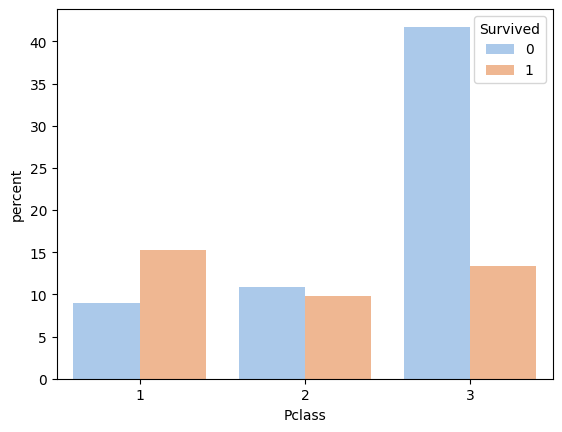

In [ ]:
sns.countplot(x = "Pclass", hue = "Survived", data = data, stat='percent', palette= 'pastel');
print(data['Survived'].groupby(data['Pclass']).mean())

there is a clear relationship between pcslss and survived.
the fisrt class has the higer survivilty rate.


#Name

In [ ]:
data["Title"] = data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
data["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

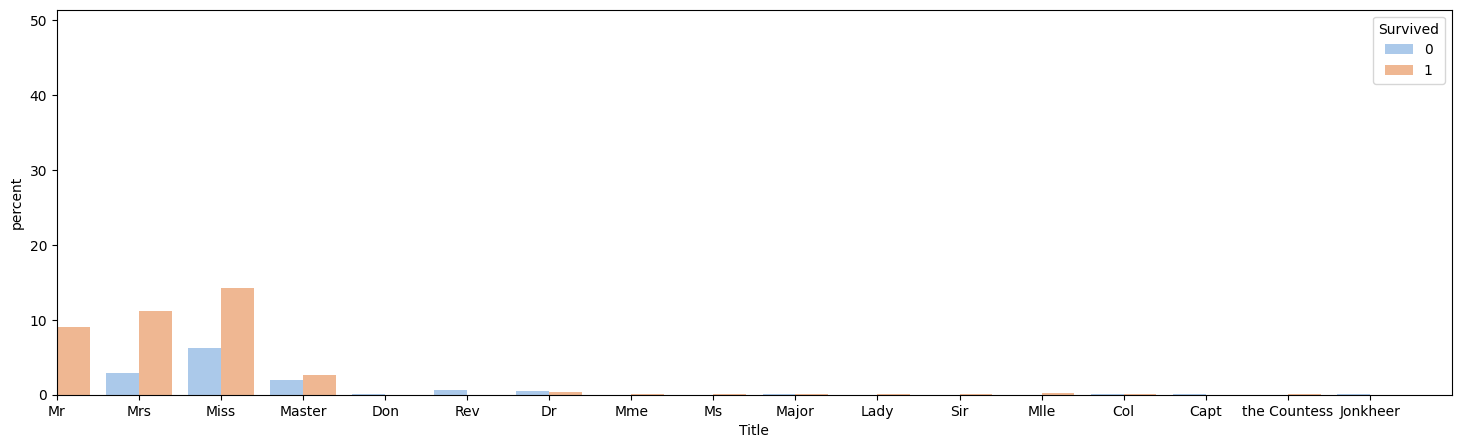

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64


In [ ]:
plt.figure(figsize=(18, 5))
ax = sns.countplot(x = "Title", hue = "Survived", data = data, stat='percent', palette= 'pastel');
ax.set_xlim(0,17)
plt.show()
print(data['Survived'].groupby(data['Title']).mean())

#Sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


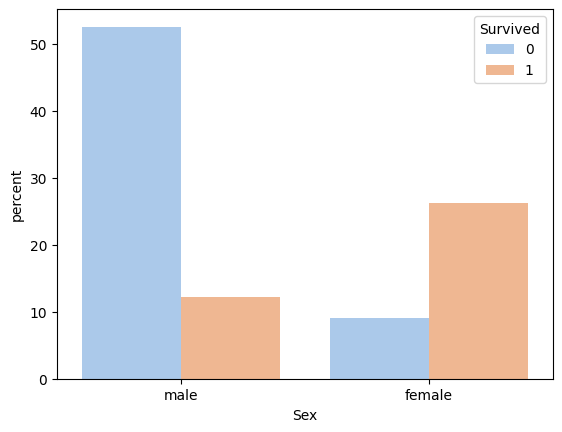

In [ ]:
sns.countplot(x = "Sex", hue = "Survived", data = data, stat='percent', palette= 'pastel');
print(data['Survived'].groupby(data['Sex']).mean())

<Axes: xlabel='Sex', ylabel='Count'>

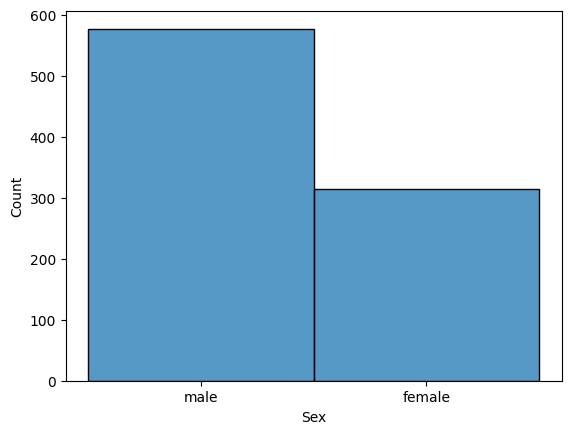

In [ ]:
sns.histplot(x = data['Sex'], legend = True)

in this category the number of male is higher than the number of females.

#Age

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


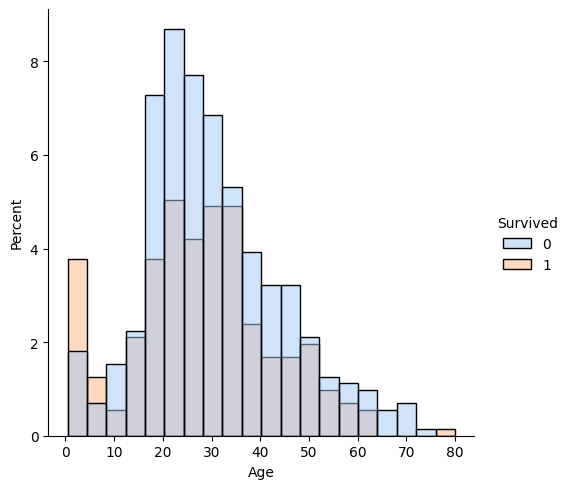

In [ ]:
sns.displot(x = "Age", hue = "Survived", data = data, stat='percent', palette= 'pastel');
print(data['Age'].groupby(data['Survived']).mean().sort_values(ascending=False))

<Axes: xlabel='Age', ylabel='Density'>

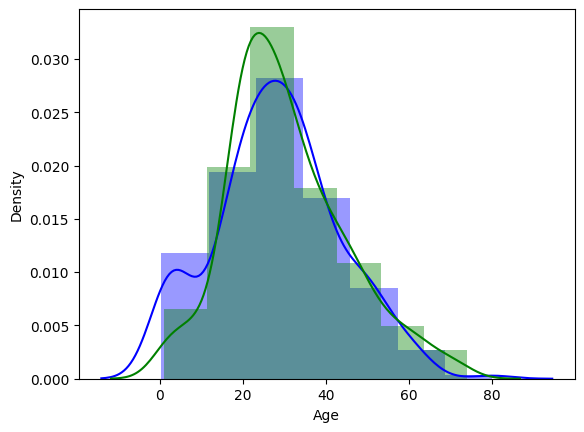

In [ ]:
sns.distplot(data[data.Survived==1]["Age"],color="b", bins=7, label="1")
sns.distplot(data[data.Survived==0]["Age"],color="g", bins=7, label="1")

#SibSp + Parch

In [ ]:
print(data["SibSp"].unique())
print(data["Parch"].unique())
data['Family'] = data["SibSp"] + data["Parch"]
print(data["Family"].unique())

[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
[ 1  0  4  2  6  5  3  7 10]


In [ ]:
print(data["Survived"].groupby(data["Family"]).mean().sort_values(ascending=False))

Family
3     0.724138
2     0.578431
1     0.552795
6     0.333333
0     0.303538
4     0.200000
5     0.136364
7     0.000000
10    0.000000
Name: Survived, dtype: float64


Family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


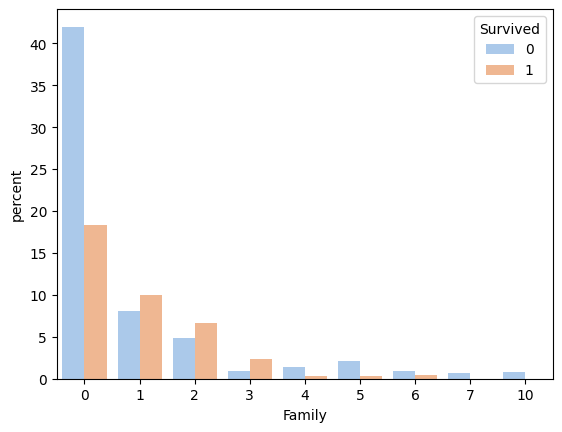

In [ ]:
sns.countplot(x = "Family", hue = "Survived", data = data, stat='percent', palette= 'pastel');
print(data['Survived'].groupby(data['Family']).mean())

#Ticket

In [ ]:
# Get first letters of the tickets
data["Ticket"] = data["Ticket"].apply(lambda x : str(x)[0])
# Surviving rates of first letters
print(data.groupby("Ticket")["Survived"].mean().sort_values(ascending=False))

Ticket
9    1.000000
P    0.646154
1    0.630137
F    0.571429
2    0.464481
C    0.340426
S    0.323077
L    0.250000
3    0.239203
4    0.200000
6    0.166667
W    0.153846
7    0.111111
A    0.068966
5    0.000000
8    0.000000
Name: Survived, dtype: float64


Ticket
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64


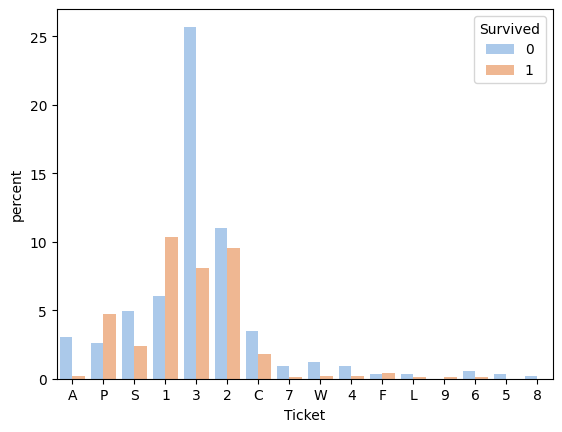

In [ ]:
sns.countplot(x = "Ticket", hue = "Survived", data = data, stat='percent', palette= 'pastel');
print(data['Survived'].groupby(data['Ticket']).mean())

#Fare

Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 248, dtype: float64


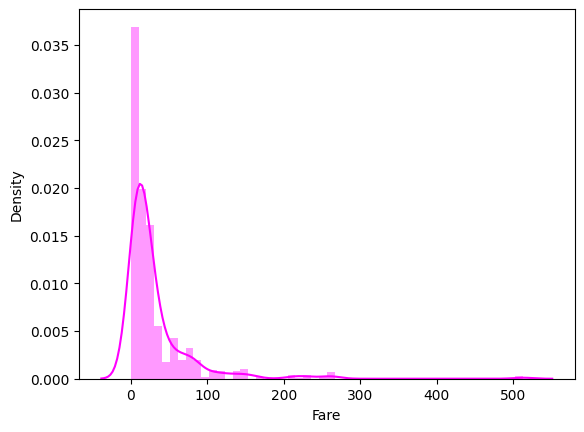

In [ ]:
sns.distplot(data['Fare'], color="magenta");
print(data['Survived'].groupby(data['Fare']).mean())

#Embarked

In [ ]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


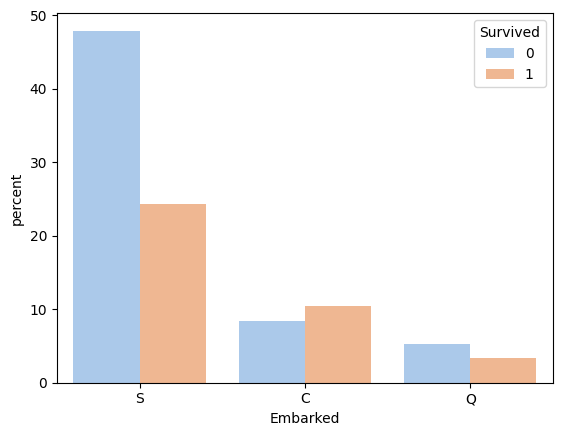

In [ ]:
sns.countplot(x = "Embarked", hue = "Survived", data = data, stat='percent', palette= 'pastel');
print(data['Survived'].groupby(data['Embarked']).mean())

###So in this stage we consider all the features except cabine.

#Feature engineeing
1. Filling missing values(Age, Embareked)
2. Encoding(Name, Ticket, Pclass, Parch, SibSp)




##Age

In the Age, the number of missing values are low and the pattern of missing is random. Using median can be a good option to fill the missing values.

In [ ]:
# data['Age'].fillna(value = data['Age'].median(), inplace = True)
age_impute = SimpleImputer(strategy='median')
data['Age'] = age_impute.fit_transform(data[['Age']])

##Embarked

for embarked we use mode either, becuase most its value_counts were not equal.

In [ ]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
embarked_mode = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(embarked_mode)

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Title       0
Family      0
dtype: int64

#Encoding

1. Encoding Method: Label Encoding
Rationale: Pclass is an ordinal feature, as the classes have a natural ordering (1st, 2nd, 3rd). Label encoding is a suitable choice because the numerical labels can be interpreted by the model as the ordinal nature of the feature.
Sex:

2. Encoding Method: Label Encoding
Rationale: Sex is a binary categorical feature, with values 'male' and 'female'. Label encoding is a simple and effective choice, as the model can interpret the numerical labels as the binary nature of the feature.
Name:

3. Encoding Method: One-Hot Encoding of Titles
Rationale: The name feature likely contains useful information, such as titles (Mr., Mrs., Miss, etc.). By extracting the titles and creating one-hot encoded columns, we can preserve the categorical nature of the titles without assuming any ordering between them.
Embarked:

4. Encoding Method: Label Encoding, One-Hot Encoding, Target Encoding
Rationale: Embarked is a categorical feature representing the port of embarkation. Label encoding is a suitable choice, as the numerical labels can be interpreted by the model. One-hot encoding is also a valid option, as it preserves the categorical nature of the feature without assuming any ordering. Target encoding can be a good choice, as the model may be able to learn patterns between the port of embarkation and the target variable (Survived).
Age, Fare:

5. Encoding Method: Scaling
Rationale: Age and Fare are numerical features. While no encoding is required for numerical features, it's often beneficial to scale them to ensure that the features have a similar range of values. This can help the model converge faster and perform better, especially when using algorithms that are sensitive to the scale of the features, such as linear regression or neural networks.
Name, Ticket, Cabin:

6. Encoding Method: Target Encoding
Rationale: These features are textual and may contain useful information that is not easily captured by simple encoding techniques. Target encoding can be a good choice, as the model may be able to learn patterns between these features and the target variable (Survived).

In [ ]:
data

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,Title_Lowlevel_Title,Title_Middlelevel_Title,Embarked_Q,Embarked_S,Family_Big_family,Family_Small_family,Ticket_Expensive_Ticket,Ticket_Moderate_Ticket
0,0,1,1,1,0,1,1,0,0,1,0,1,0,0
1,1,0,1,1,0,0,0,0,0,0,0,1,1,0
2,1,0,1,1,0,1,0,0,0,1,0,0,0,1
3,1,0,1,1,0,0,0,0,0,1,0,1,1,0
4,0,1,1,1,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,1,1,0,1,0,0,1,0,0,0,1
887,1,0,1,1,0,0,0,0,0,1,0,0,1,0
888,0,0,1,1,0,1,0,0,0,1,0,1,0,0
889,1,1,1,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Group the family_size column
def family_level(family_size):
    if family_size == 0:
        return "Alone"
    elif family_size <=3:
        return "Small_family"
    else:
        return "Big_family"

# Group the Ticket column
def ticket_level(ticket_name):
    if ticket_name in ["F", "1", "P", "9"]:
        return "Expensive_Ticket"
    elif ticket_name in ["S", "C", "2"]:
        return "Moderate_Ticket"
    else:
        return "Cheap_Ticket"

# Group the Title column
def title_level(title):
    if title in ["the Countess", "Mlle", "Lady", "Ms", "Sir", "Mme", "Mrs", "Miss", "Master"]:
        return "Highlevel_Title"
    elif title in ["Major", "Col", "Dr"]:
        return "Middlelevel_Title"
    else:
        return "Lowlevel_Title"

In [ ]:
data['Family'] = data['Family'].apply(family_level)
data['Ticket'] = data['Ticket'].apply(ticket_level)
data['Title'] = data['Title'].apply(title_level)

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
# data['Pclass'] = label_encoder.fit_transform(data['Pclass'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])
# data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [ ]:
# One-Hot Encoding
data = pd.get_dummies(columns=['Pclass', 'Title', 'Embarked', 'Family', 'Ticket'], data = data, drop_first=True)
# data = pd.concat([data, name_dummies], axis=1)


In [ ]:
data = data.drop(['Name', 'SibSp', 'Parch'], axis = 1)


In [ ]:
# Encode the true and false values for the one-hot encoded title columns
for col in data.columns:
    data[col] = data[col].astype(bool).astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Survived                 891 non-null    int64
 1   Sex                      891 non-null    int64
 2   Age                      891 non-null    int64
 3   Fare                     891 non-null    int64
 4   Pclass_2                 891 non-null    int64
 5   Pclass_3                 891 non-null    int64
 6   Title_Lowlevel_Title     891 non-null    int64
 7   Title_Middlelevel_Title  891 non-null    int64
 8   Embarked_Q               891 non-null    int64
 9   Embarked_S               891 non-null    int64
 10  Family_Big_family        891 non-null    int64
 11  Family_Small_family      891 non-null    int64
 12  Ticket_Expensive_Ticket  891 non-null    int64
 13  Ticket_Moderate_Ticket   891 non-null    int64
dtypes: int64(14)
memory usage: 97.6 KB


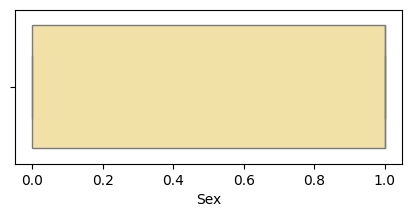

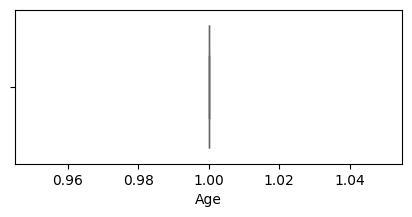

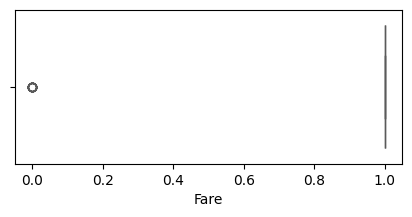

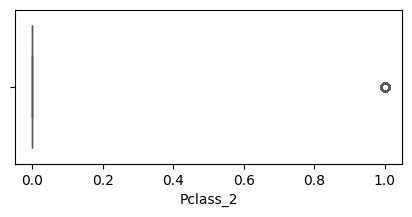

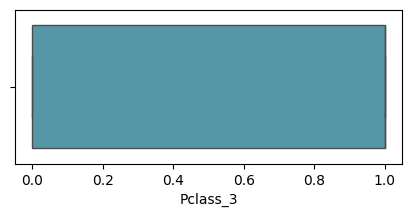

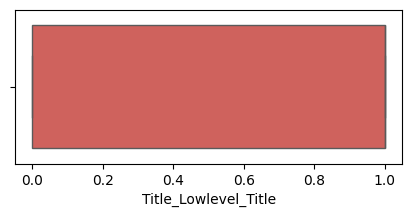

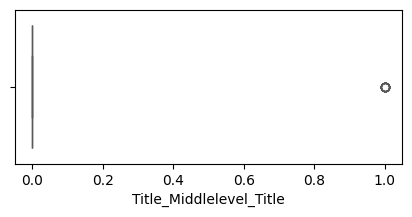

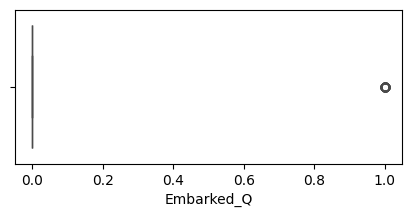

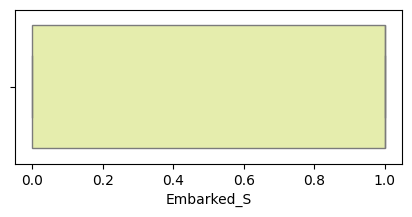

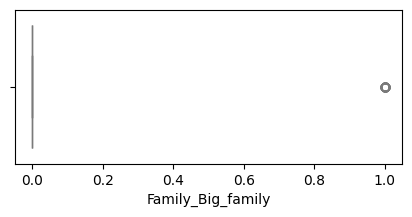

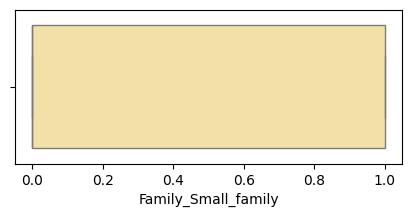

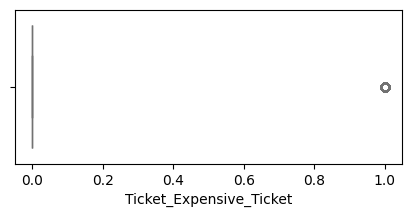

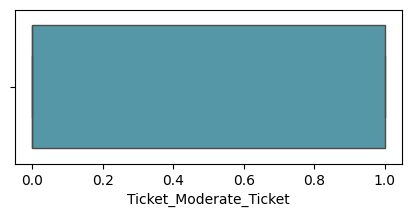

In [ ]:
color=sns.color_palette("Spectral")
def boxPlot(dff):
    d = data.drop(columns=['Survived'])
    for column in d:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=column, data=d,orient='v',color=random.choice(color))

boxPlot(data)

NO specific outliers observed.

#Model
##1.scaling
##2.Train_Test_Split
##3.implimenting of models with RandomSearch and KerasTuning

In [ ]:
#Splitting data into features and target
x = data.drop('Survived', axis = 1)
y = data['Survived']
x.shape, y.shape

((891, 13), (891,))

In [ ]:
#stratify Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 18)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.5, random_state = 18)

In [ ]:
#Scaling data with standard-scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#in this stage first i implemented a simple neural networks

In [ ]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy']);

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val));

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5015 - loss: 0.7032 - val_accuracy: 0.6635 - val_loss: 0.6519
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6249 - loss: 0.6375 - val_accuracy: 0.6891 - val_loss: 0.6180
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6859 - loss: 0.6335 - val_accuracy: 0.7083 - val_loss: 0.5941
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7130 - loss: 0.5930 - val_accuracy: 0.7115 - val_loss: 0.5693
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8120 - loss: 0.5156 - val_accuracy: 0.7340 - val_loss: 0.5486
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7624 - loss: 0.5014 - val_accuracy: 0.7372 - val_loss: 0.5327
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7726 - loss: 0.5045 - val_accuracy: 0.7436 - val_loss: 0.5185
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7782 - loss: 0.4772 - val_accuracy: 0.7436 - val_loss: 0.

#Using Random-search and keras-tunner for hyper-tuning

This code defines a function called build_model that takes a hyperparameter object hp as an argument. The purpose of this function is to create a Keras model with hyperparameters that can be tuned using the Keras Tuner library.

##1.Hyperparameter Definitions:

neurons1: An integer hyperparameter that represents the number of units in the first hidden layer, with a range of 32 to 512 and a step size of 32.
neurons2: An integer hyperparameter that represents the number of units in the second hidden layer, with a range of 32 to 512 and a step size of 32.
num_layers: An integer hyperparameter that represents the number of hidden layers, with a range of 1 to 3 and a step size of 1.
dropout_rate: A float hyperparameter that represents the dropout rate, with a range of 0.0 to 0.5 and a step size of 0.1.
batch_size: A categorical hyperparameter that represents the batch size, with possible values of 32, 64, and 128.
activation: A categorical hyperparameter that represents the activation function, with possible values of 'relu', 'tanh', 'elu', and 'selu'.
lr: A float hyperparameter that represents the learning rate, with a range of 1e-4 to 1e-2 and a log-scale sampling.
optimizer: A categorical hyperparameter that represents the optimizer, with possible values of 'sgd' and 'adam'.
##2.Optimizer Selection:

Based on the chosen optimizer hyperparameter, the code creates the corresponding Keras optimizer (SGD or Adam) with the specified learning rate.
##3.Model Definition:

The function creates a Keras Sequential model.
It adds a Flatten layer to the model to handle the input shape.
It then adds a number of hidden layers (determined by the num_layers hyperparameter) with the specified number of units (neurons1) and activation function (activation). After each hidden layer, a Dropout layer is added with the specified dropout rate (dropout_rate).
Finally, it adds a Dense output layer with a single unit and a sigmoid activation function.
##4.Model Compilation:

The model is compiled with the binary cross-entropy loss function, the chosen optimizer, and the accuracy metric.
##5.Return the Model:

The function returns the constructed Keras model.

In [ ]:
def build_model(hp):
    neurons1 = hp.Int("units1", min_value=32, max_value=512, step=32)
    neurons2 = hp.Int("units2", min_value=32, max_value=512, step=32)
    num_layers = hp.Int("num_layers", min_value=1, max_value=3, step=1)
    dropout_rate = hp.Float("dropout_rate", min_value=0.0, max_value=0.5, step=0.1)
    batch_size = hp.Choice("batch_size", values=[32, 64, 128])
    activation = hp.Choice("activation", values=['relu', 'tanh', 'elu', 'selu'])
    lr = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=['sgd', 'adam'])

    if optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    model = Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)))

    for _ in range(num_layers):
        model.add(tf.keras.layers.Dense(neurons1, activation=activation))
        model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:
random_search_tunner = kt.RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 3,
    overwrite = True,
    seed = 18
)

In [ ]:
result = random_search_tunner.search(X_train, y_train, epochs = 10, validation_data=(X_val, y_val) , validation_split=0.2)

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.6506410241127014

Best val_accuracy So Far: 0.8141025900840759
Total elapsed time: 00h 00m 10s


In [ ]:
best_model = random_search_tunner.get_best_models()[0]

In [ ]:
best_params = random_search_tunner.get_best_hyperparameters()[0]
best_params.values

{'units1': 384,
 'units2': 352,
 'num_layers': 1,
 'dropout_rate': 0.2,
 'batch_size': 64,
 'activation': 'relu',
 'learning_rate': 0.0001428379365495633,
 'optimizer': 'adam'}

In [ ]:
best_trial = random_search_tunner.oracle.get_best_trials()[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
units1: 384
units2: 352
num_layers: 1
dropout_rate: 0.2
batch_size: 64
activation: relu
learning_rate: 0.0001428379365495633
optimizer: adam
Score: 0.8141025900840759


In [ ]:
history = best_model.fit(X_train, y_train, epochs = 60, validation_data=(X_val, y_val))

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7526 - loss: 0.6125 - val_accuracy: 0.8077 - val_loss: 0.6314
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7507 - loss: 0.5995 - val_accuracy: 0.7981 - val_loss: 0.6187
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7777 - loss: 0.5670 - val_accuracy: 0.7981 - val_loss: 0.6067
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7735 - loss: 0.5737 - val_accuracy: 0.7917 - val_loss: 0.5962
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8043 - loss: 0.5494 - val_accuracy: 0.7885 - val_loss: 0.5863
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8046 - loss: 0.5397 - val_accuracy: 0.7885 - val_loss: 0.5776
Epoch 7/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8413 - loss: 0.5004 - val_accuracy: 0.7885 - val_loss: 0.5689
Epoch 8/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8425 - loss: 0.4942 - val_accuracy: 0.7821 - val_los

In [ ]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8469 - loss: 0.3663  


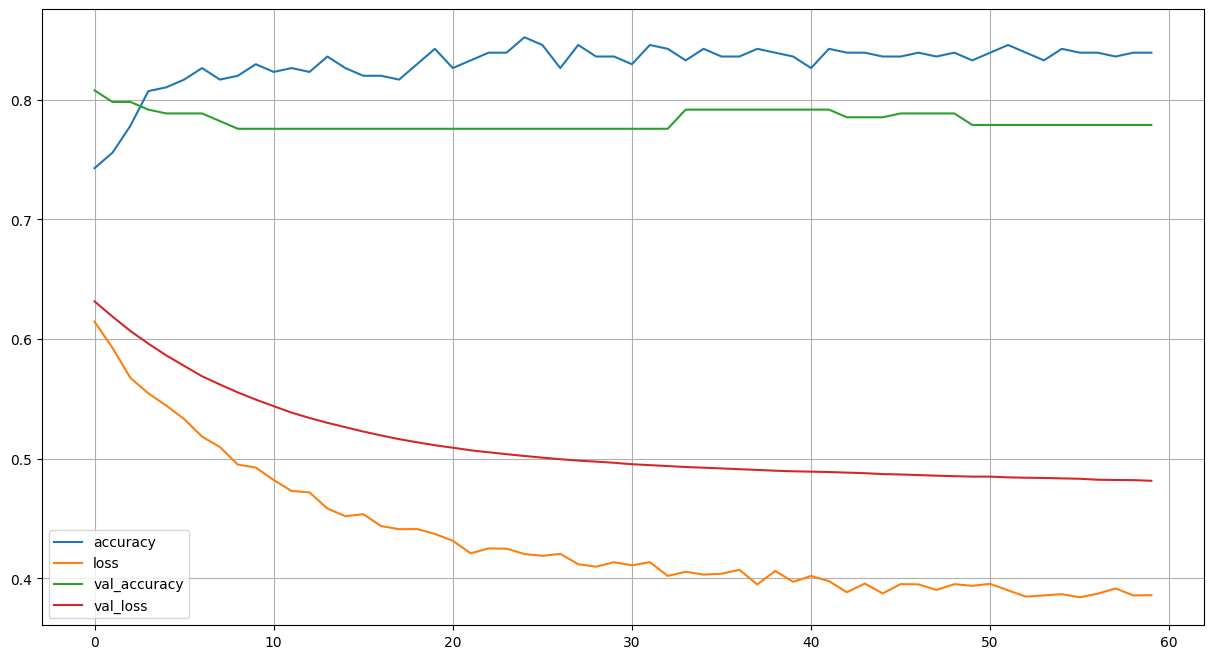

In [ ]:
pd.DataFrame(history.history).plot(figsize = (15, 8))
plt.grid(True)
plt.gca()
plt.show()

verall, the results indicate that the model is able to achieve a reasonably high training accuracy (around 0.8) and a low training loss (around 10), but the model's performance on the validation set is not as good, with a lower validation accuracy (around 0.7) and a higher validation loss. This suggests that the model may be overfitting to the training data and not generalizing well to new, unseen data.

#Before hyper-tuning =
##-Test Accuracy: 0.8097
##-Test Loss: 0.4393


#After hyper-tuning =

##-Test Accuracy: 0.8469
##-Test Loss: 0.3663

In [ ]:
gtg

In [ ]:
t

In [ ]:
th

In [ ]:
h

In [ ]:
t

In [ ]:
th

In [ ]:
t

In [ ]:
h

In [ ]:
h

In [ ]:
htr

In [ ]:
r

In [ ]:
r

In [ ]:
t

In [ ]:
h

In [ ]:
rth

In [ ]:
r

In [ ]:
rt

In [ ]:
th

In [ ]:
hr

In [ ]:
thrthrth